# **CIÊNCIA DE DADOS** - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

(C) 2025-2026 CARLOS M D VIEGAS

https://github.com/cmdviegas


# Distribuições de Frequência e Probabilidade

Este notebook apresenta conceitos fundamentais sobre distribuições de frequência e probabilidade, aplicados a dados **discretos e contínuos**.

Vamos seguir as seguintes etapas:
1. Distribuições de Frequência
2. Da Frequência à Probabilidade
3. Distribuições Discretas (Bernoulli, Binomial, Poisson)
4. Distribuições Contínuas (Normal, Exponencial, Uniforme)

## 1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## 2. Distribuições de Frequência

As distribuições de frequência organizam e resumem dados mostrando **quantas vezes cada valor aparece**.

Vamos criar um conjunto de **notas de alunos** e calcular:

- Frequência Absoluta (`fi`): número de o'orange'rências;
- Frequência Relativa (`fri`): proporção em relação ao total;
- Frequência Acumulada (`Fi`): soma progressiva das frequências;
- Frequência Relativa Acumulada (`Fri`): soma progressiva das proporções.


In [2]:
# Exemplo: notas obtidas por 30 alunos
notas = [5, 6, 7, 8, 8, 8, 9, 5, 6, 7, 7, 7, 9, 10, 6, 8, 9, 10, 5, 6, 6, 7, 8, 9, 5, 6, 7, 7, 8, 9]
df = pd.DataFrame({'nota': notas})
df.head()

,nota
0,5
1,6
2,7
3,8
4,8


In [3]:
# Frequência Absoluta (fi)
# Quantos alunos tiraram tal nota?
freq_abs = df['nota'].value_counts().sort_index()
freq_abs

# .value_counts() -> Conta quantas vezes cada valor distinto aparece nessa coluna (gera uma tabela de frequência absoluta)
# .sort_index() -> Ordena o resultado pelo índice — ou seja, pelas notas (valores), não pela frequência

nota
5     4
6     6
7     7
8     6
9     5
10    2
Name: count, dtype: int64

<Axes: title={'center': 'Frequência Absoluta das Notas'}, xlabel='Nota', ylabel='Frequência'>

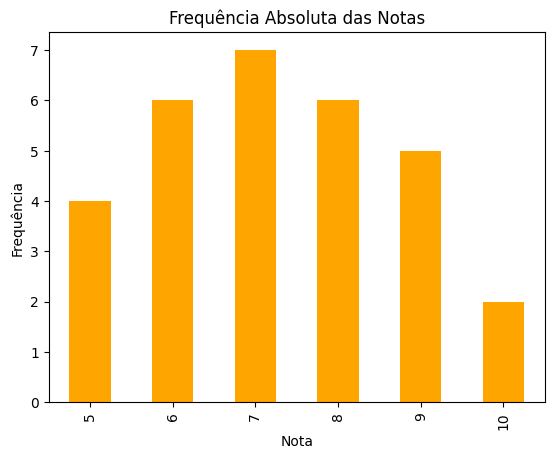

In [4]:
# Gráfico de barras - Frequência Absoluta
freq_abs.plot(kind='bar', title='Frequência Absoluta das Notas', xlabel='Nota', ylabel='Frequência', color='orange')

In [5]:
# Frequência Relativa (fri)
# Qual a porcentagem de alunos que obtiveram aquela nota?
freq_rel = df['nota'].value_counts(normalize=True).sort_index()
freq_rel

# .value_counts(normalize=True) -> Faz o mesmo que .value_counts(), mas divide cada contagem pelo total de elementos

nota
5     0.133333
6     0.200000
7     0.233333
8     0.200000
9     0.166667
10    0.066667
Name: proportion, dtype: float64

<Axes: title={'center': 'Frequência Relativa das Notas'}, xlabel='Nota', ylabel='Proporção'>

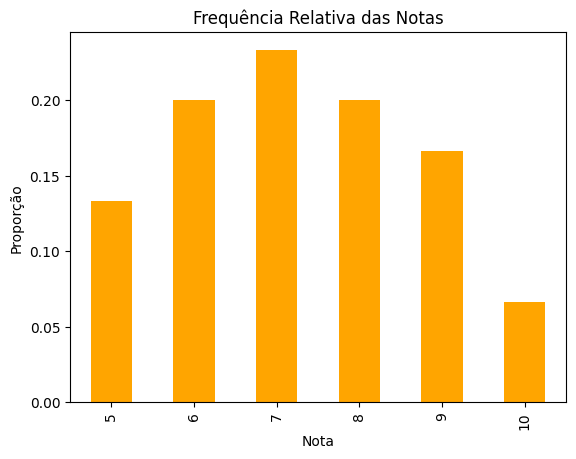

In [6]:
# Gráfico de barras - Frequência Relativa
freq_rel.plot(kind='bar', title='Frequência Relativa das Notas', xlabel='Nota', ylabel='Proporção', color='orange')

In [7]:
# Frequência Acumulada (Fi)
# Quantos alunos tiraram até aquela nota?
freq_acum = freq_abs.cumsum()
freq_acum

nota
5      4
6     10
7     17
8     23
9     28
10    30
Name: count, dtype: int64

<Axes: title={'center': 'Frequência Acumulada'}, xlabel='Nota', ylabel='Frequência'>

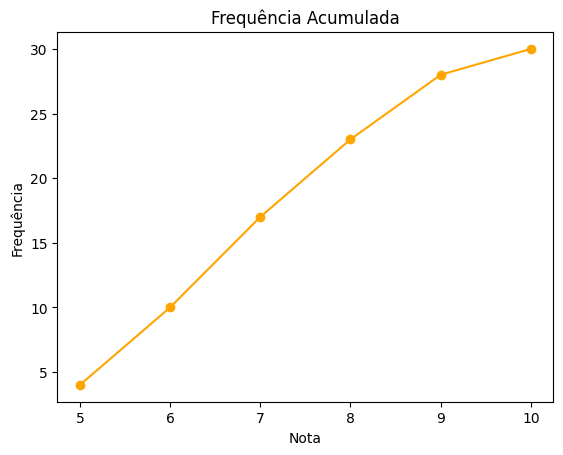

In [8]:
# Gráfico de linha - Frequência Acumulada
freq_acum.plot(kind='line', marker='o', title='Frequência Acumulada', xlabel='Nota', ylabel='Frequência', color='orange')

In [9]:
# Frequência Relativa Acumulada (Fri)
# Qual a porcentagem de alunos que obtiveram até aquela nota?
freq_rel_acum = freq_rel.cumsum()
freq_rel_acum

nota
5     0.133333
6     0.333333
7     0.566667
8     0.766667
9     0.933333
10    1.000000
Name: proportion, dtype: float64

<Axes: title={'center': 'Frequência Relativa Acumulada'}, xlabel='Nota', ylabel='Proporção Acumulada'>

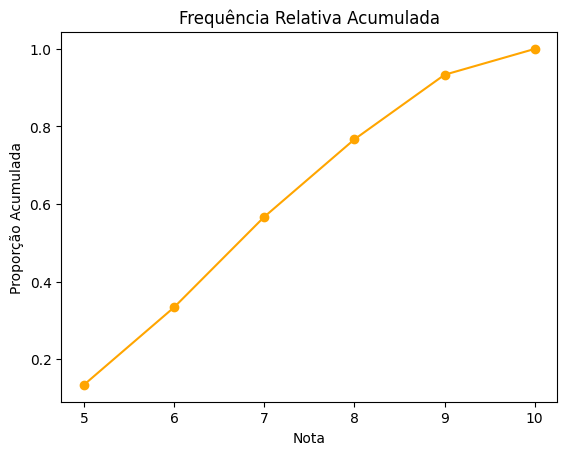

In [10]:
# Gráfico de linha - Frequência Relativa Acumulada
freq_rel_acum.plot(kind='line', marker='o', title='Frequência Relativa Acumulada', xlabel='Nota', ylabel='Proporção Acumulada', color='orange')

In [ ]:
# Tabela final com todas as colunas
freq_table = pd.DataFrame({
    'Frequência Absoluta': freq_abs,
    'Frequência Relativa': freq_rel.round(4),
    'Frequência Acumulada': freq_acum,
    'Frequência Relativa Acumulada': freq_rel_acum.round(4)
})
freq_table

## 3. Distribuições de Probabilidade (Discretas)

Uma **distribuição discreta** lista todos os valores possíveis de uma variável e suas probabilidades.

### 3.1. Distribuição de Bernoulli

A Bernoulli modela um evento com dois possíveis resultados (sucesso ou fracasso).

In [ ]:
# O aluno foi aprovado (nota ≥ 7) ou reprovado (nota < 7)?
df['aprovado'] = (df['nota'] >= 7).astype(int)
p = df['aprovado'].mean()
print(f"Probabilidade de sucesso (p): {p:.2f}")

In [ ]:
# Podemos simular vários alunos seguindo essa probabilidade
n = 1000
sim_bern = np.random.binomial(1, p, n)
pd.Series(sim_bern).value_counts(normalize=True)

In [ ]:
xs = [0, 1]
probs = [1 - p, p]

# Gráfico da distribuição de Bernoulli
plt.figure(figsize=(6,4))
plt.bar(xs, probs, color='orange', alpha=0.9, width=0.4)
plt.xticks(xs, ['0 = Reprovado', '1 = Aprovado'])
plt.ylim(0, 1)
plt.title(f'Distribuição de Bernoulli — p = {p:.2f}')
plt.ylabel('Probabilidade')
plt.grid(axis='y', alpha=0.3)
plt.show()

Interpretação:

- Cada "lançamento" representa um aluno (sucesso = aprovado, fracasso = reprovado).

- A média dos 0's e 1's se aproxima de `p` (a probabilidade de aprovação).

### 3.2. Distribuição Binomial

A Binomial modela o número de sucessos em 𝑛 tentativas independentes, cada uma com probabilidade 𝑝 de sucesso.

In [ ]:
# Em uma turma de 10 alunos, quantos serão aprovados?
n_alunos = 10
p = df['aprovado'].mean()

# 1000 turmas simuladas
sim_binom = np.random.binomial(n=n_alunos, p=p, size=1000)
pd.Series(sim_binom).value_counts(normalize=True).sort_index().plot(kind='bar', color='orange')
plt.title('Distribuição Binomial — Aprovados em uma turma de 10 alunos')
plt.xlabel('Número de alunos aprovados')
plt.ylabel('Probabilidade')
plt.show()

Interpretação:

- O eixo X mostra quantos alunos (de 10) foram aprovados.

- O formato se aproxima de uma curva simétrica, com maior probabilidade perto do valor esperado `n * p`.

- "Se montarmos várias turmas de 10 alunos com a mesma taxa de aprovação, normalmente teremos 6 ou 7 alunos aprovados por turma. Turmas com todos aprovados (10) ou todos reprovados (0) são raras."

### 3.3. Distribuição de Poisson

In [ ]:
# “Quantos alunos tiram exatamente 10 em uma turma?”

λ = (df['nota'] == 10).sum() / len(df) * 10  # média esperada de notas 10 por turma de 10 alunos
print(f"Média esperada de notas 10 por turma: {λ:.2f}")

sim_poisson = np.random.poisson(lam=λ, size=1000)
pd.Series(sim_poisson).value_counts(normalize=True).sort_index().plot(kind='bar', color='orange')
plt.title('Distribuição de Poisson — Alunos com nota 10 por turma')
plt.xlabel('Número de alunos com nota 10')
plt.ylabel('Probabilidade')
plt.show()


Interpretação:

- Mostra a probabilidade de 0, 1, 2, ... alunos tirarem 10 numa turma de mesmo tamanho.

- Útil para eventos raros e independentes (como tirar nota máxima).

### 3.4. Função de Massa de Probabilidade (PMF)

A variável aleatória 𝑋 é a nota do aluno, e a PMF mostra 𝑃 (𝑋 = 𝑥𝑖), isto é, a probabilidade de um aluno tirar uma determinada nota.

In [ ]:
pmf = freq_rel.copy() 
pmf

plt.figure(figsize=(6,4))
pmf.plot(kind='bar', color='orange')
plt.title('Função Massa de Probabilidade (PMF) — Notas dos Alunos')
plt.xlabel('Nota')
plt.ylabel('Probabilidade P(X = x)')
plt.grid(axis='y', alpha=0.3)
plt.show()

O que a forma da PMF revela:

- A distribuição é discreta e concentrada entre 6 e 9.

- A nota 7 tem a maior probabilidade — é o modo da distribuição.

- As notas extremas (5 e 10) têm baixa probabilidade — representam as caudas.

- O formato lembra uma curva ligeiramente assimétrica à direita, pois há poucos 10.

Em outras palavras:

> A PMF mostra como as probabilidades estão distribuídas entre as possíveis notas.


A soma das probabilidades deve ser igual a **1**, pois cobre todos os resultados possíveis.


In [ ]:
pmf.sum()

## 4. Distribuições de Probabilidade (Contínuas)

Uma **distribuição contínua** representa variáveis que podem assumir **qualquer valor em um intervalo**, e suas probabilidades são dadas **pela área sob a curva da função densidade de probabilidade (PDF)**.

### 4.1. Distribuição Normal (média = 0, desvio padrão = 1)

A curva é **simétrica** em torno da média, e descreve fenômenos naturais como alturas, pesos e medidas físicas.

In [ ]:
# Exemplo: alturas de 450 jogadores da NBA
alturas_m = np.random.normal(loc=2.00, scale=0.10, size=450) # Altura média = 2,00 m, desvio padrão = 0,10 m
alturas_m = np.clip(alturas_m, 1.75, 2.25) # Garante que fiquem entre 1.75 m e 2.25 m
df_nba = pd.DataFrame({'altura_m': alturas_m}) # Cria o dataframe
df_nba.head()

In [ ]:
# Histograma + curva teórica da Normal
plt.figure(figsize=(6,4))
plt.hist(df_nba['altura_m'], bins=20, density=True, color='orange', alpha=0.5, label='PDF empírica')

# Curva Normal teórica
x = np.linspace(1.75, 2.25, 200)
media = df_nba['altura_m'].mean()
desvio = df_nba['altura_m'].std()
y = (1 / (desvio * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / desvio)**2)

plt.plot(x, y, color='black', lw=2, label='Curva Normal teórica')
plt.title('Distribuição Normal — Altura de Jogadores da NBA')
plt.xlabel('Altura (m)')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

A função de distribuição acumulada (CDF) da **Distribuição Normal** é dada por:

$$
F(x) = P(X \le x) = \frac{1}{2} \left[ 1 + \operatorname{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

onde:
- $ \mu $ é a **média**,
- $ \sigma $ é o **desvio padrão**,
- $ \operatorname{erf} $ é a **função erro**, usada para calcular a área sob a curva normal.

A CDF da normal tem formato **em "S"**, indicando:
- regiões centrais (próximas à média) com maior densidade,
- caudas (extremos) com probabilidades acumuladas lentas.


In [ ]:
import math

# Ordena valores e calcula CDF empírica
valores = np.sort(df_nba['altura_m'])
cdf = np.arange(1, len(valores) + 1) / len(valores)

# Plota a CDF empírica
plt.figure(figsize=(6,4))
plt.plot(valores, cdf, color='orange', lw=2, label='CDF empírica')

# Curva teórica da CDF Normal
media = df_nba['altura_m'].mean()
desvio = df_nba['altura_m'].std()
x = np.linspace(1.75, 2.25, 200)
erf_vec = np.vectorize(math.erf)
cdf_teorica = 0.5 * (1 + erf_vec((x - media) / (desvio * np.sqrt(2))))
plt.plot(x, cdf_teorica, color='black', lw=2, linestyle='--', label='CDF teórica')

plt.title('CDF — Distribuição Normal (Altura dos Jogadores)')
plt.xlabel('Altura (m)')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# De forma mais simples, podemos usar o Scipy

from scipy import stats

# Dados
x = np.linspace(1.75, 2.25, 200)
media = df_nba['altura_m'].mean()
desvio = df_nba['altura_m'].std()

# PDF e CDF com SciPy
pdf = stats.norm.pdf(x, loc=media, scale=desvio)
cdf = stats.norm.cdf(x, loc=media, scale=desvio)

# Gráficos
plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='orange', label='PDF (scipy)')
plt.plot(x, cdf, color='black', linestyle='--', label='CDF (scipy)')
plt.title('Distribuição Normal — SciPy')
plt.xlabel('Altura (m)')
plt.ylabel('Probabilidade / Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 4.2. Distribuição Exponencial (λ = 1)

A distribuição exponencial modela o **tempo até a ocorrência de um evento**,  como o tempo de espera em filas ou o tempo entre falhas.

A função densidade de probabilidade (PDF) da **Distribuição Exponencial** é:

$$
f(x) =
\begin{cases}
\lambda e^{-\lambda (x - a)}, & x \ge a \\
0, & x < a
\end{cases}
$$

onde:
- $ \lambda $ é a **taxa de ocorrência** (λ = 1/θ),  
- $ a $ é o **ponto inicial** da distribuição (deslocamento, se houver).

In [ ]:
# Simula alturas "exponenciais" (apenas para efeito didático)
exp_data = np.random.exponential(scale=0.1, size=450) + 1.75  # desloca para faixa [1.75, ...] -> [1.75, +∞)
exp_data = np.clip(exp_data, 1.75, 2.25)
df_exp = pd.DataFrame({'altura_m': exp_data})

plt.figure(figsize=(6,4))
plt.hist(df_exp['altura_m'], bins=20, density=True, color='orange', alpha=0.5, label='PDF empírica')

# Curva teórica Exponencial
x = np.linspace(1.75, 2.25, 200)
λ = 1 / 0.1  # inverso da média (escala)
y = λ * np.exp(-λ * (x - 1.75))
y[x < 1.75] = 0  # garante que antes do mínimo seja zero

plt.plot(x, y, color='black', lw=2, label='Curva Exponencial teórica')
plt.title('Distribuição Exponencial — Exemplo comparativo')
plt.xlabel('Altura (m)')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

A CDF da **Distribuição Exponencial** é dada por:

$$
F(x) =
\begin{cases}
1 - e^{-\lambda (x - a)}, & x \ge a \\
0, & x < a
\end{cases}
$$

onde:
- $ \lambda $ é o **parâmetro de taxa** ($ \lambda = 1/\theta $),
- $ a $ é o ponto inicial (caso a distribuição esteja deslocada).

A CDF cresce rapidamente e **se aproxima de 1 de forma assintótica**, mostrando que a maior parte das observações ocorre logo no início.


In [ ]:
# CDF empírica
valores = np.sort(df_exp['altura_m'])
cdf = np.arange(1, len(valores) + 1) / len(valores)

plt.figure(figsize=(6,4))
plt.plot(valores, cdf, color='orange', lw=2, label='CDF empírica')

# CDF teórica da Exponencial
x = np.linspace(1.75, 2.25, 200)
λ = 1 / 0.1
cdf_teorica = 1 - np.exp(-λ * (x - 1.75))
cdf_teorica[x < 1.75] = 0
plt.plot(x, cdf_teorica, color='black', lw=2, linestyle='--', label='CDF teórica')

plt.title('CDF — Distribuição Exponencial (Exemplo Comparativo)')
plt.xlabel('Altura (m)')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# De forma mais simples, podemos usar o Scipy
from scipy import stats

# Parâmetro (lambda = 1/scale)
escala = 0.1
x = np.linspace(1.75, 2.25, 200)

# PDF e CDF com SciPy
pdf = stats.expon.pdf(x, loc=1.75, scale=escala)
cdf = stats.expon.cdf(x, loc=1.75, scale=escala)

plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='orange', label='PDF (scipy)')
plt.plot(x, cdf, color='black', linestyle='--', label='CDF (scipy)')
plt.title('Distribuição Exponencial — SciPy')
plt.xlabel('x')
plt.ylabel('Probabilidade / Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 4.3. Distribuição Uniforme (0 a 1)

A função densidade de probabilidade (PDF) da **Distribuição Uniforme Contínua** é:

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & a \le x \le b \\
0, & \text{caso contrário}
\end{cases}
$$

onde:
- $ a $ é o **limite inferior**,  
- $ b $ é o **limite superior**.

Todos os valores entre $ a $ e $ b $ são **igualmente prováveis**, e a área total sob a linha é igual a **1**.

In [ ]:
# Simula alturas "uniformes" (para comparação)
uni_data = np.random.uniform(low=1.75, high=2.25, size=450)
df_uni = pd.DataFrame({'altura_m': uni_data})

plt.figure(figsize=(6,4))
plt.hist(df_uni['altura_m'], bins=20, density=True, color='orange', alpha=0.5, label='PDF empírica')

# Curva teórica Uniforme
x = np.linspace(1.75, 2.25, 200)
y = np.ones_like(x) * (1 / (2.25 - 1.75))  # densidade constante

plt.plot(x, y, color='black', lw=2, label='Curva Uniforme teórica')
plt.title('Distribuição Uniforme — Exemplo comparativo')
plt.xlabel('Altura (m)')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

A CDF da **Distribuição Uniforme Contínua** é:

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{x - a}{b - a}, & a \le x \le b \\
1, & x > b
\end{cases}
$$

onde:
- $ a $ é o **limite inferior**,
- $ b $ é o **limite superior**.

A CDF cresce **linearmente** de 0 até 1 no intervalo $[a, b]$, indicando uma **probabilidade acumulada constante** ao longo do domínio.


In [ ]:
# Gera dados uniformes
uni_data = np.random.uniform(low=1.75, high=2.25, size=450)
df_uni = pd.DataFrame({'altura_m': uni_data})

# CDF empírica
valores = np.sort(df_uni['altura_m'])
cdf = np.arange(1, len(valores) + 1) / len(valores)

plt.figure(figsize=(6,4))
plt.plot(valores, cdf, color='orange', lw=2, label='CDF empírica')

# CDF teórica da Uniforme
x = np.linspace(1.75, 2.25, 200)
a, b = 1.75, 2.25
cdf_teorica = (x - a) / (b - a)
cdf_teorica[x < a] = 0
cdf_teorica[x > b] = 1
plt.plot(x, cdf_teorica, color='black', lw=2, linestyle='--', label='CDF teórica')

plt.title('CDF — Distribuição Uniforme (Exemplo Comparativo)')
plt.xlabel('Altura (m)')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# De forma mais simples, podemos usar o Scipy
from scipy import stats

a, b = 1.75, 2.25
x = np.linspace(a, b, 200)

# PDF e CDF com SciPy
pdf = stats.uniform.pdf(x, loc=a, scale=(b - a))
cdf = stats.uniform.cdf(x, loc=a, scale=(b - a))

plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='orange', label='PDF (scipy)')
plt.plot(x, cdf, color='black', linestyle='--', label='CDF (scipy)')
plt.title('Distribuição Uniforme — SciPy')
plt.xlabel('x')
plt.ylabel('Probabilidade / Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 5. Conclusões

- **Distribuições de Frequência** mostram o que foi observado nos dados reais.

- **Distribuições de Probabilidade** descrevem o que esperamos observar.  

- A **PMF** é usada para variáveis discretas, a **PDF** para contínuas, e a **CDF** mostra a acumulação da probabilidade.  

Esses conceitos serão a base para **testes de hipóteses e inferência estatística**.
